<b><i>Background:</i></b>
<b>The dataset "Absenteeism at work" records instances of absenteeism in a courier company in Brazil from July 2007 to July 2010. The dataset includes various features such as individual identification, reasons for absence, month of absence, day of the week, seasons, transportation expenses, distance from residence to work, and more. The goal is to identify patterns and insights related to absenteeism for potential business improvements.</b>

# Problem Identification

The company is facing challenges related to absenteeism, impacting productivity and potentially leading to financial losses. The key issues and areas of concern include:<br>
>1.Utilize k-means clustering to categorize employees into groups based on relevant features.<br>
>2.Explore cluster characteristics and identify commonalities among employees within each cluster.

<b>The company may be struggling with workforce planning due to unpredictable absenteeism patterns. Understanding and predicting these patterns could help optimize scheduling and resource allocation.</b>

In [256]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:
# Import warnings module
import warnings
# Do not print warnings on screen
warnings.filterwarnings("ignore")

In [258]:
#Read the dataset
raw_data= pd.read_csv("C://SOUPARNA//Data Analytics//Machine Learning//Project//End Term Project//Part-2//Copy of Absenteeism_at_work.csv")

In [259]:
df=raw_data.copy()

In [260]:
#Check if the dataset is loaded properly
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [261]:
df.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,0,1,1,0,0,1,77,175,25,0


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [263]:
#The total number of elements present in this dataset
df.size

15540

In [264]:
#Number of columns and rows present
df.shape

(740, 21)

In [265]:
#Check the datatypes of the different columns in the dataframe
df.dtypes

ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object

In [266]:
#Statistical measures of the numerical columns
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [267]:
#Check if there are any missing values in the dataset
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [268]:
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

In [269]:
df['Month of absence'].value_counts()

3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64

In [270]:
df = df[df['Month of absence'] != 0]

In [271]:
df.shape

(737, 21)

In [272]:
# Check for duplicated values
duplicated_values = df.duplicated().sum()
print("\nDuplicated Values:", duplicated_values)


Duplicated Values: 34


In [273]:
# Check for duplicated values
duplicated_records = df[df.duplicated(keep=False)]
duplicated_records.head(6)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
16,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
63,34,23,10,3,4,118,10,10,37,253465,...,0,1,0,0,0,0,83,172,28,3
68,34,23,10,3,4,118,10,10,37,253465,...,0,1,0,0,0,0,83,172,28,3
81,28,23,11,4,4,225,26,9,28,306345,...,0,1,1,0,0,2,69,169,24,1
88,28,23,11,4,4,225,26,9,28,306345,...,0,1,1,0,0,2,69,169,24,1


In [274]:
df=df.drop_duplicates()
df.shape

(703, 21)

In [275]:
#Dropping the column not needed for the analysis
#(in our analysis we do not need ID)
#'Absenteeism time in hours' this is our taget variable in the dataset, therefore we are rtemoving the label
df.drop(['ID','Absenteeism time in hours'],axis=1,inplace=True)

In [276]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30


In [277]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index'],
      dtype='object')

# Peforming standard scaling

In [278]:
from sklearn.preprocessing import StandardScaler
selected_features = ['Reason for absence','Month of absence','Day of the week','Seasons','Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target','Education','Son','Pet', 'Weight', 'Height', 'Body mass index']
#selected_features = ['Reason for absence','Month of absence','Day of the week','Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target','Son','Pet', 'Weight', 'Height', 'Body mass index']
#data = df[selected_features] 
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[selected_features])

In [279]:
scaled_data

array([[ 0.83728602,  0.16605306, -0.62393274, ...,  0.86072506,
        -0.03321735,  0.79819093],
       [-2.25628865,  0.16605306, -0.62393274, ...,  1.48396669,
         0.93977426,  1.0340582 ],
       [ 0.4803351 ,  0.16605306,  0.07786681, ...,  0.78281986,
        -0.35754789,  1.0340582 ],
       ...,
       [-0.70950131,  0.16605306, -1.32573229, ..., -0.69737901,
        -0.51971316, -0.3811454 ],
       [-0.59051767,  0.16605306, -0.62393274, ...,  0.86072506,
        -0.03321735,  0.79819093],
       [-0.9474686 ,  0.16605306, -0.62393274, ...,  0.70491465,
        -0.03321735,  0.56232367]])

In [280]:
df[selected_features] = scaled_data

In [281]:
df.head(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.837286,0.166053,-0.623933,-1.384065,0.978751,0.456461,0.116383,-0.526930,-0.823481,0.644178,0,-0.435938,0.850361,1,0,0.186224,0.860725,-0.033217,0.798191
1,-2.256289,0.166053,-0.623933,-1.384065,-1.563953,-1.107871,1.259077,2.072056,-0.823481,0.644178,1,-0.435938,-0.054032,1,0,-0.579363,1.483967,0.939774,1.034058


In [282]:
df.tail(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
735,-0.590518,0.166053,-0.623933,-1.384065,0.978751,0.456461,0.116383,-0.526930,-0.189542,-0.405926,0,-0.435938,0.850361,1,0,0.186224,0.860725,-0.033217,0.798191
736,-0.947469,0.166053,-0.623933,-1.384065,0.175791,-1.243900,0.344921,0.084596,-0.189542,-0.405926,0,2.539445,-0.054032,0,0,0.186224,0.704915,-0.033217,0.562324


# Optimal K value Calculation

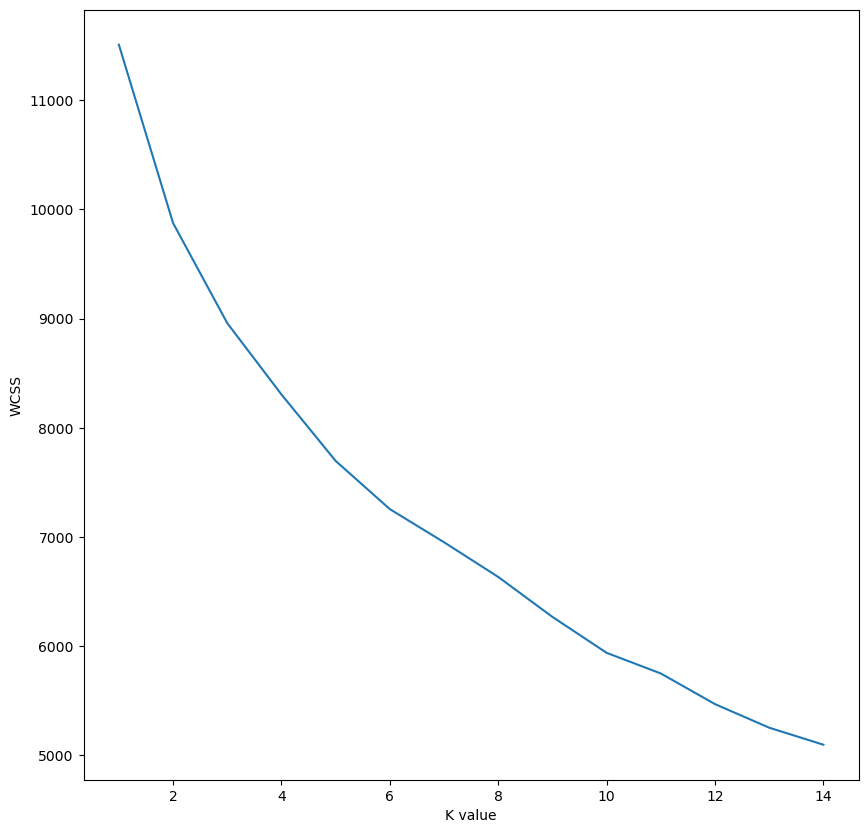

In [283]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

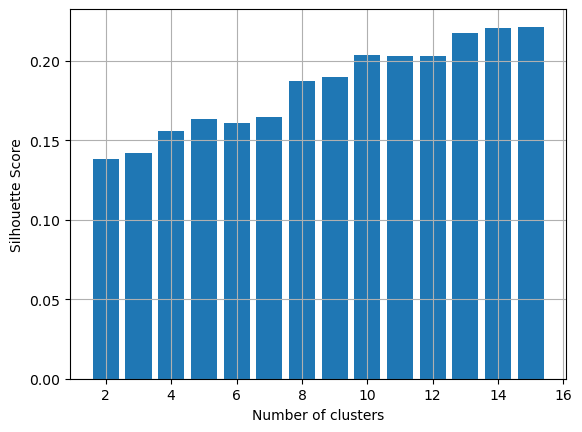

In [284]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,16):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


#Reference: https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation
#Other criteria for checking: https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation 


<b>The Silhouette Score is maximum at k=14.We can also confirm the value from the elbow method.</b>

In [285]:
kmeans = KMeans(n_clusters = 14)
clusters = kmeans.fit_predict(df)

In [286]:
clusters

array([ 2,  9,  8,  5,  2,  8,  6, 12,  0,  7, 12, 12, 12,  8,  8,  5,  8,
        1,  2,  7,  8,  6, 12,  3,  6,  3,  4,  3,  8,  8,  2,  7,  2,  8,
        6,  3, 11,  2, 12,  1,  4,  8,  2,  0,  4,  8,  3, 12,  3, 12, 11,
        1,  4,  3,  9,  1,  8, 11,  2,  8, 12,  8,  4,  9, 13,  8,  1,  1,
        2,  3,  8,  1, 12,  3,  1,  3,  6, 12,  8,  1,  8,  5, 10,  0,  1,
        3,  0,  1,  5,  1, 12,  2,  1,  3, 10,  2,  4,  9,  7,  1, 12,  4,
        6,  1, 12,  1,  4,  5,  1,  1,  4,  4,  0,  1,  1,  1,  1,  4,  1,
        4,  4,  4,  4, 13, 10,  4,  1, 10,  1,  5,  8,  0,  1, 12, 10, 10,
       10,  1,  1, 13,  1,  1,  7,  7,  1,  1, 10, 12,  0,  5, 10, 12, 13,
       10, 12,  5,  0, 12,  0, 10,  5, 12,  1, 10,  8,  1,  1, 13,  1,  1,
        8, 10,  1, 10,  1, 10,  1,  0, 10,  0,  1, 12,  8,  9, 10, 10, 10,
       10, 12, 10,  0,  6, 10,  7,  2, 10,  0,  0,  8,  1,  1,  0,  8, 10,
       10, 11,  6, 10,  8,  9,  6, 10,  6, 10, 10, 10,  8,  0, 10,  9,  7,
        9,  9,  6,  8,  8

In [287]:
df["Cluster"] = clusters
df["Cluster"].unique()

array([ 2,  9,  8,  5,  6, 12,  0,  7,  1,  3,  4, 11, 13, 10])

In [288]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Cluster
0,0.837286,0.166053,-0.623933,-1.384065,0.978751,0.456461,0.116383,-0.526930,-0.823481,0.644178,0,-0.435938,0.850361,1,0,0.186224,0.860725,-0.033217,0.798191,2
1,-2.256289,0.166053,-0.623933,-1.384065,-1.563953,-1.107871,1.259077,2.072056,-0.823481,0.644178,1,-0.435938,-0.054032,1,0,-0.579363,1.483967,0.939774,1.034058,9
2,0.480335,0.166053,0.077867,-1.384065,-0.656907,1.476677,1.259077,0.237477,-0.823481,0.644178,0,-0.435938,-0.958425,1,0,-0.579363,0.782820,-0.357548,1.034058,8
3,-1.423403,0.166053,0.779666,-1.384065,0.830054,-1.651986,0.344921,0.390359,-0.823481,0.644178,0,-0.435938,0.850361,1,1,-0.579363,-0.853189,-0.681878,-0.617013,5
4,0.480335,0.166053,0.779666,-1.384065,0.978751,0.456461,0.116383,-0.526930,-0.823481,0.644178,0,-0.435938,0.850361,1,0,0.186224,0.860725,-0.033217,0.798191,2


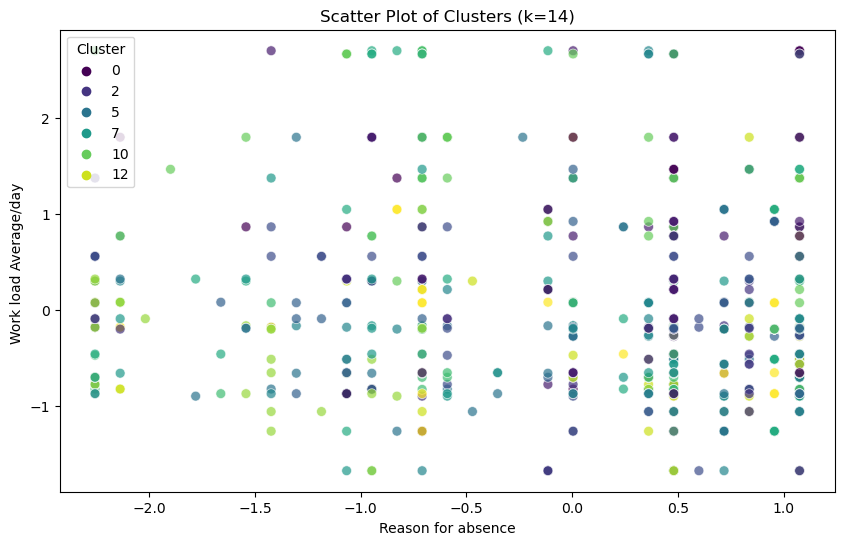

In [289]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reason for absence', y='Work load Average/day ', hue='Cluster', data=df, palette='viridis', s=50, alpha=0.7)
plt.title('Scatter Plot of Clusters (k=14)')
plt.xlabel('Reason for absence')
plt.ylabel('Work load Average/day ')
plt.legend(title='Cluster')
plt.show()

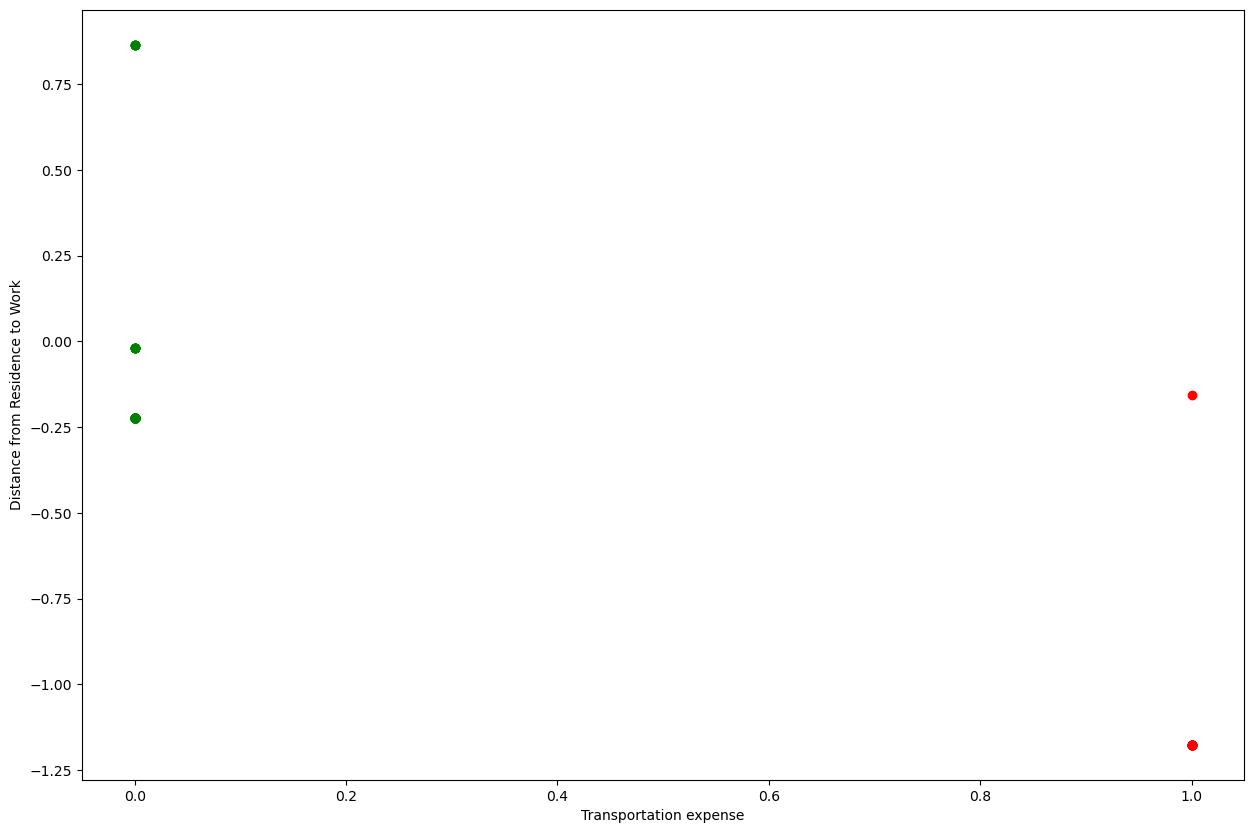

In [290]:
# Plot data after k = 14 clustering

plt.figure(figsize = (15, 10))
plt.scatter(df["Social drinker"][df["Cluster"] == 0],df["Distance from Residence to Work"][df["Cluster"] == 0], color = "red")
plt.scatter(df["Social drinker"][df["Cluster"] == 1],df["Distance from Residence to Work"][df["Cluster"] == 1], color = "green")
plt.xlabel('Transportation expense')
plt.ylabel('Distance from Residence to Work')
plt.show()

In [291]:
kmeans.cluster_centers_

array([[ 2.81972612e-02, -3.65905285e-01, -4.13392876e-01,
        -1.05760692e-01, -1.01278641e+00, -1.14187806e+00,
         2.83977736e-01, -3.99528923e-01,  7.26916111e-01,
         2.94143631e-01, -6.93889390e-18, -4.35938077e-01,
         7.90067875e-01,  1.00000000e+00,  3.33333333e-02,
        -5.79363284e-01,  1.19831428e+00,  3.79928850e+00,
        -4.04732122e-01],
       [ 3.67532425e-01, -4.12034352e-02,  1.59895324e-01,
         2.49045103e-01, -6.81088814e-02, -1.31819652e-01,
        -7.32476235e-01, -1.22184619e+00,  3.80824324e-01,
         9.18508757e-02,  2.08166817e-17, -4.35938077e-01,
        -1.87959175e-02,  1.11022302e-16,  0.00000000e+00,
         8.52384200e-01, -8.30930792e-01, -5.74470262e-01,
        -6.38455140e-01],
       [ 3.80263446e-02,  2.04600771e-01, -3.64572038e-01,
        -1.04468170e-01,  3.47115227e-01, -2.85783422e-01,
         1.85937859e-01,  1.20129569e+00, -4.95835469e-01,
         5.63483489e-02,  1.08695652e-01, -4.35938077e-01,
    

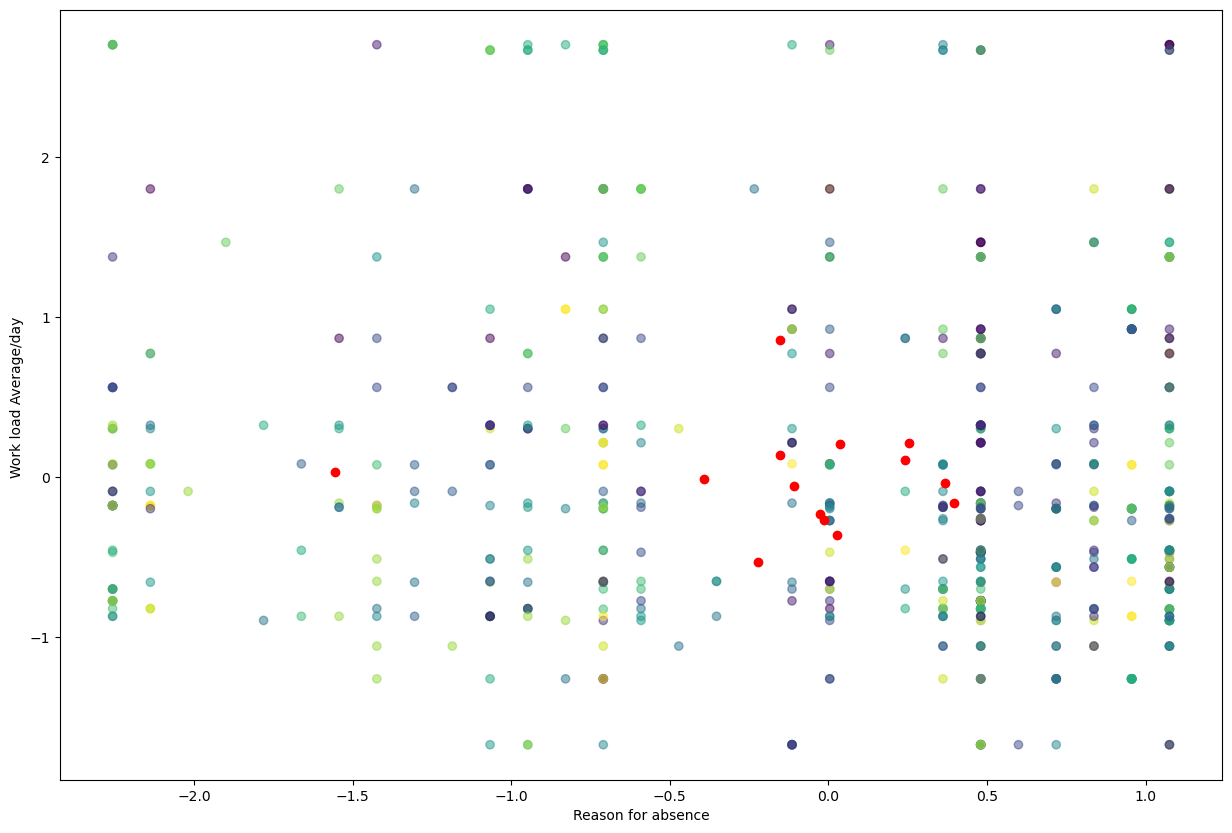

In [292]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(df["Reason for absence"], df["Work load Average/day "], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('Reason for absence')
plt.ylabel('Work load Average/day ')
plt.show()

In [293]:
kmeans.inertia_

5169.236459232901

# Interpretation

Interpreting the results of a k-means clustering analysis involves understanding both the characteristics of the clusters formed and the validation metrics used, such as the silhouette score and the elbow method.

<b>Clusters Characteristics:</b>

><b>Overlapping Clusters:</b> The mention of "overlapping clusters" suggests that there is some degree of similarity or proximity between data points assigned to different clusters. This could indicate that the inherent structure of the data might not be well-suited to strict separation into distinct clusters.

><b>Lack of Well-Defined Structure:</b> The statement about "specific well-structured clusters not being formed" implies that the clusters may not exhibit clear and distinct boundaries. This lack of structure could be due to the nature of the data or the chosen features, suggesting that the inherent patterns in the data may not align well with the assumptions of the k-means algorithm.

><b>Inertia Value:</b>

>The inertia value of 5850.410129391323 is a measure of the sum of squared distances between data points and their assigned cluster centers. A higher inertia value suggests that the data points within clusters are more dispersed, indicating less compact and less well-defined clusters.
Optimal k (Number of Clusters):

The optimal k value of 14, where the silhouette score was maximum and confirmed by the elbow method, suggests that, according to these validation metrics, the data is best represented by 14 clusters.

<b>Silhouette Score:</b> The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. The fact that the optimal k corresponds to the maximum silhouette score suggests that, within the chosen k value, there is better separation between clusters.

<b>Elbow Method:</b> The elbow method is a heuristic for finding the point where the rate of decrease in inertia sharply changes. The optimal k is often chosen at this point, balancing the desire for lower inertia with the risk of overfitting.

In summary, the results suggest that the data might not naturally form well-separated, distinct clusters, and the chosen k value of 14 provides the best representation according to the silhouette score and elbow method.